In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
warnings.filterwarnings('always')

## 20 data

In [7]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')
data.head()

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

#Hyper parameter tuning
#Changing the C variable made no effect
#n_jobs = -1, solver = 'sag' - did a little worse
# n_jobs = -1, solver = 'saga' - did a little worse
# n_jobs = -1, solver = 'saga', random_state = 42


lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'cool')
# #disp.plot()
# plt.show()

Accuracy: 0.6
Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999
Confusion Matrix: 
 [[0 0]
 [2 3]]
              precision    recall  f1-score   support

0 - Detained       0.00      0.00      0.00         0
1 - Released       1.00      0.60      0.75         5

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5



C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PCA

In [50]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')
data.head()

#predicting whether the released or not (0 -> detained, 1-> released) 
#drop only release so PCA does the work
x = data.drop(columns = ['release'], axis = 1) 
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Apply PCA
pca = PCA()  #n_components=0.95 Retain 95% of variance
#Hyperparameter Tuning 
#Random state - no effect
#n_components - numbers made little different. When flaots the model does badly >0.5

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# # Print the explained variance ratio of each principal component
# print("Explained Variance Ratio per Principal Component:")
# print(pca.explained_variance_ratio_)

# # Print the number of components
# print(f"Number of Principal Components: {pca.n_components_}")

# # Print the PCA components
# print("\nPCA Components (Linear Combinations of Original Features):")
# print(pca.components_)

# Initialize the Logistic Regression model
pca_lr_model = LogisticRegression(max_iter = 1000)
#random state - no effect

# Train the model
pca_lr_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = pca_lr_model.predict(X_test_pca)


#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

Accuracy: 0.6
Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999
Confusion Matrix: 
 [[0 0]
 [2 3]]
              precision    recall  f1-score   support

0 - Detained       0.00      0.00      0.00         0
1 - Released       1.00      0.60      0.75         5

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5



C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 300k data

In [2]:
#import the dataset
data = pd.read_csv('sampled_file_300k.csv')
data.head()

,county,new_id,sex,race,judge_id,case_type,offence_category,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,highest_severity,release,probation,med_house_income,year,jail,violent_crime
0,13,153765,1,3,1106,0,31,20,20,0,2,0,7.0,1,0.0,69902.0,2005,0.0,0
1,44,889245,0,1,1013,0,31,18,19,1,0,3,7.0,0,0.0,26297.0,2008,8.0,0
2,59,650004,1,3,517,0,35,32,33,2,0,0,7.0,0,0.0,57278.0,2001,45.0,0
3,56,868753,0,3,456,1,39,19,20,4,3,0,12.0,1,1.0,49393.0,2013,0.0,0
4,40,318360,1,0,1581,2,63,37,37,0,0,0,7.0,1,0.0,34239.0,2004,30.0,0


## Base Model - No PCA

In [2]:
#import the dataset
data = pd.read_csv('sampled_file_300k.csv')
data.head()

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

#Hyper parameter tuning
#Changing the C variable made no effect
#n_jobs = -1, solver = 'sag' - did a little worse
# n_jobs = -1, solver = 'saga' - did a little worse
# n_jobs = -1, solver = 'saga', random_state = 42


lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'cool')
# #disp.plot()
# plt.show()

Accuracy: 0.8121866666666666
Precision: 0.8008003106691205
Recall: 0.9539795241064425
F1 Score: 0.8707042150095462
ROC AUC: 0.7436709312182729
Log Loss: 6.7694786885213905
Confusion Matrix: 
 [[13485 11798]
 [ 2288 47429]]
              precision    recall  f1-score   support

0 - Detained       0.85      0.53      0.66     25283
1 - Released       0.80      0.95      0.87     49717

    accuracy                           0.81     75000
   macro avg       0.83      0.74      0.76     75000
weighted avg       0.82      0.81      0.80     75000



In [5]:
#import the dataset
data = pd.read_csv('sampled_file_300k.csv')
data.head()

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 10000, C = 1.0, solver = 'saga', n_jobs = -1, penalty = 'l1', random_state = 0) #default max iter does not converge

#Hyper parameter tuning
#Changing the C variable made no effect
#n_jobs = -1, solver = 'sag' - did a little worse
# n_jobs = -1, solver = 'saga' - did a little worse
# n_jobs = -1, solver = 'saga', random_state = 42


lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

# disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'cool')
# #disp.plot()
# plt.show()

Accuracy: 0.7922
Precision: 0.7794223590280961
Recall: 0.9574994468692801
F1 Score: 0.8593322682840975
Confusion Matrix: 
 [[11811 13472]
 [ 2113 47604]]
              precision    recall  f1-score   support

0 - Detained       0.85      0.47      0.60     25283
1 - Released       0.78      0.96      0.86     49717

    accuracy                           0.79     75000
   macro avg       0.81      0.71      0.73     75000
weighted avg       0.80      0.79      0.77     75000



## Using PCA

In [9]:
#import the dataset
data = pd.read_csv('sampled_file_300k.csv')
data.head()

#predicting whether the released or not (0 -> detained, 1-> released) 
#drop only release so PCA does the work
x = data.drop(columns = ['release'], axis = 1) 
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Apply PCA
pca = PCA()  #n_components=0.95 Retain 95% of variance
#Hyperparameter Tuning 
#Random state - no effect
#n_components - numbers made little different. When flaots the model does badly >0.5

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# # Print the explained variance ratio of each principal component
# print("Explained Variance Ratio per Principal Component:")
# print(pca.explained_variance_ratio_)

# Print the number of components
print(f"Number of Principal Components: {pca.n_components_}")

# # Print the PCA components
# print("\nPCA Components (Linear Combinations of Original Features):")
# print(pca.components_)

# Initialize the Logistic Regression model
pca_lr_model = LogisticRegression(max_iter = 1000)
#random state - no effect

# Train the model
pca_lr_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = pca_lr_model.predict(X_test_pca)


#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

Number of Principal Components: 18
Accuracy: 0.75744
Precision: 0.7401538813133237
Recall: 0.9771305589637347
F1 Score: 0.8422914210416812
Confusion Matrix: 
 [[ 8228 17055]
 [ 1137 48580]]
              precision    recall  f1-score   support

0 - Detained       0.88      0.33      0.47     25283
1 - Released       0.74      0.98      0.84     49717

    accuracy                           0.76     75000
   macro avg       0.81      0.65      0.66     75000
weighted avg       0.79      0.76      0.72     75000



# 500k data

In [9]:
#import the dataset
data = pd.read_csv('sampled_file_500k.csv')
data.head()

,county,new_id,sex,race,judge_id,case_type,offence_category,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,highest_severity,release,probation,med_house_income,year,jail,violent_crime
0,30,369136,1,0,978,2,49,39,40,3,2,0,10.0,1,1.0,62350.0,2014,0.0,0
1,1,90240,1,3,322,2,16,18,18,1,0,0,7.0,1,1.0,47081.0,2002,0.0,0
2,27,930588,1,1,1447,2,5,25,27,3,6,9,10.0,0,0.0,41351.0,2007,30.0,0
3,44,275737,0,3,1058,1,55,49,49,0,0,0,10.0,1,1.0,54555.0,2007,0.0,0
4,41,579161,1,3,1027,2,64,17,17,0,2,0,10.0,1,1.0,47081.0,2007,0.0,0


## No PCA

Accuracy: 0.811512
Precision: 0.7990645197292991
Recall: 0.9544672290091138
F1 Score: 0.8698797709185899
ROC AUC: 0.7441795757171346
Log Loss: 6.793796140007913
Confusion Matrix: 
 [[22684 19804]
 [ 3757 78755]]
              precision    recall  f1-score   support

0 - Detained       0.86      0.53      0.66     42488
1 - Released       0.80      0.95      0.87     82512

    accuracy                           0.81    125000
   macro avg       0.83      0.74      0.76    125000
weighted avg       0.82      0.81      0.80    125000



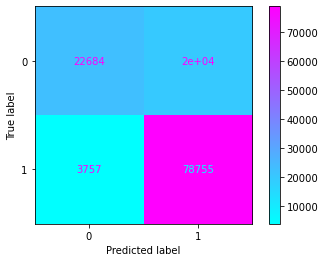

In [10]:
#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#base model (using the default parameters)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'ROC AUC: {auc}')
print(f'Log Loss: {logloss}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'cool')
#disp.plot()
plt.show()

## Using PCA

In [11]:
#predicting whether the released or not (0 -> detained, 1-> released) 
#drop only release so PCA does the work
x = data.drop(columns = ['release'], axis = 1) 
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Apply PCA
pca = PCA()  #n_components=0.95 Retain 95% of variance
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# # Print the explained variance ratio of each principal component
# print("Explained Variance Ratio per Principal Component:")
# print(pca.explained_variance_ratio_)

# # Print the number of components
# print(f"Number of Principal Components: {pca.n_components_}")

# # Print the PCA components
# print("\nPCA Components (Linear Combinations of Original Features):")
# print(pca.components_)

# Initialize the Logistic Regression model
pca_lr_model = LogisticRegression(max_iter = 1000)

# Train the model
pca_lr_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = pca_lr_model.predict(X_test_pca)


#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'ROC AUC: {auc}')
print(f'Log Loss: {logloss}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

Accuracy: 0.756264
Precision: 0.7380680102829645
Recall: 0.9777486910994765
F1 Score: 0.8411679760607657
ROC AUC: 0.6519439181349388
Log Loss: 8.785135902449857
Confusion Matrix: 
 [[13857 28631]
 [ 1836 80676]]
              precision    recall  f1-score   support

0 - Detained       0.88      0.33      0.48     42488
1 - Released       0.74      0.98      0.84     82512

    accuracy                           0.76    125000
   macro avg       0.81      0.65      0.66    125000
weighted avg       0.79      0.76      0.72    125000



# Whole dataset

In [15]:
#import the dataset
data = pd.read_csv('modified_dataset.csv')
data.head()

,county,new_id,sex,race,judge_id,case_type,offence_category,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,highest_severity,release,probation,med_house_income,year,jail,violent_crime
0,40,3,1,0,436,1,16,40,41,0,0,0,7.0,1,0.0,34942.0,2012,9.0,0
1,30,6,1,3,1049,2,13,39,40,0,0,0,9.0,1,1.0,67610.0,2000,0.0,0
2,30,7,1,0,1009,2,49,17,17,0,0,0,9.0,1,1.0,45428.0,2000,0.0,0
3,30,12,1,3,232,0,35,65,65,0,0,0,7.0,0,0.0,45428.0,2000,20.0,0
4,40,17,1,0,694,0,31,51,51,1,0,0,7.0,1,0.0,22838.0,2001,0.0,0


C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8112218685354377
Precision: 0.7992304217854077
Recall: 0.9538427352818939
F1 Score: 0.8697185608746713
ROC AUC: 0.7437330036317843
Log Loss: 6.8042535379538736
Confusion Matrix: 
 [[ 66625  58229]
 [ 11217 231800]]
              precision    recall  f1-score   support

0 - Detained       0.86      0.53      0.66    124854
1 - Released       0.80      0.95      0.87    243017

    accuracy                           0.81    367871
   macro avg       0.83      0.74      0.76    367871
weighted avg       0.82      0.81      0.80    367871



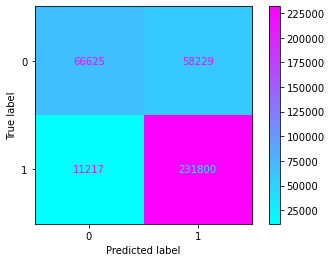

In [16]:
#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#base model (using the default parameters)
lr_model = LogisticRegression(max_iter = 2000) #default max iter does not converge neither does 1k
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'ROC AUC: {auc}')
print(f'Log Loss: {logloss}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'cool')
#disp.plot()
plt.show()

In [17]:
#predicting whether the released or not (0 -> detained, 1-> released) 
#drop only release so PCA does the work
x = data.drop(columns = ['release'], axis = 1) 
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Apply PCA
pca = PCA()  #n_components=0.95 Retain 95% of variance
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# # Print the explained variance ratio of each principal component
# print("Explained Variance Ratio per Principal Component:")
# print(pca.explained_variance_ratio_)

# # Print the number of components
# print(f"Number of Principal Components: {pca.n_components_}")

# # Print the PCA components
# print("\nPCA Components (Linear Combinations of Original Features):")
# print(pca.components_)

# Initialize the Logistic Regression model
pca_lr_model = LogisticRegression(max_iter = 1000)

# Train the model
pca_lr_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = pca_lr_model.predict(X_test_pca)


#evaluation 
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1score}')
print(f'ROC AUC: {auc}')
print(f'Log Loss: {logloss}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(classification_report(y_test, y_pred, target_names=['0 - Detained', '1 - Released']))

Accuracy: 0.7617153839253434
Precision: 0.7437164487699581
Recall: 0.9754214725718777
F1 Score: 0.8439543850779534
ROC AUC: 0.6605886576981483
Log Loss: 8.588648109753773
Confusion Matrix: 
 [[ 43169  81685]
 [  5973 237044]]
              precision    recall  f1-score   support

0 - Detained       0.88      0.35      0.50    124854
1 - Released       0.74      0.98      0.84    243017

    accuracy                           0.76    367871
   macro avg       0.81      0.66      0.67    367871
weighted avg       0.79      0.76      0.73    367871



In [ ]:
#import the dataset
data = pd.read_csv('sampled_file_300k.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params, scoring = 'accuracy')
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

## GridSearchCV Using 20

In [34]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params, scoring = 'accuracy')
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

{'C': 1.0, 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
0.8666666666666666


C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8400 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vella\anaconda3\li

In [36]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params, scoring = 'precision')
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

{'C': 1.0, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
0.9333333333333332


C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8400 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vella\anaconda3\li

In [37]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params, scoring = 'recall')
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

{'C': 1.0, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
1.0


C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8400 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vella\anaconda3\li

In [43]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params, scoring = 'f1')
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

{'C': 1.0, 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
0.9199999999999999


C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8400 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vella\anaconda3\li

In [42]:
#import the dataset
data = pd.read_csv('sampled_file_20.csv')

#predicting whether the released or not (0 -> detained, 1-> released) 
#split dataset in features and target variable
x = data.drop(columns = ['new_id', 'release', 'probation', 'med_house_income', 'year'], axis = 1) #features
y = data['release'].values #target variable

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#base model (using the default parametnewton-cholesky’ers)
lr_model = LogisticRegression(max_iter = 1000) #default max iter does not converge

params = {'penalty': ['l1', 'l2', 'elasticent'],
          'C': [1.0, 0.5, 0.25, 0.1, 0.75],
          'random_state': [0, 1, 5, 10, 20, 100],
          'solver': ['lbfgs', 'sag', 'saga'], # ‘liblinear’, ‘newton-cg’, ‘newton-cholesky' ccaused warning that they dont convierge, etc
          'max_iter': [10000, 100, 1000, 500],
          'n_jobs': ['none', -1] #none means 1
          }

gsLR = GridSearchCV(lr_model, params)
gsLR.fit(x_train, y_train)

print(gsLR.best_params_)
print(gsLR.best_score_)

{'C': 1.0, 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
0.8666666666666666


C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8400 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vella\anaconda3\li